## Final Project Submission

Please fill out:
* Student name: Jenyl Murdock
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Joe San Pietro
* Blog post URL:


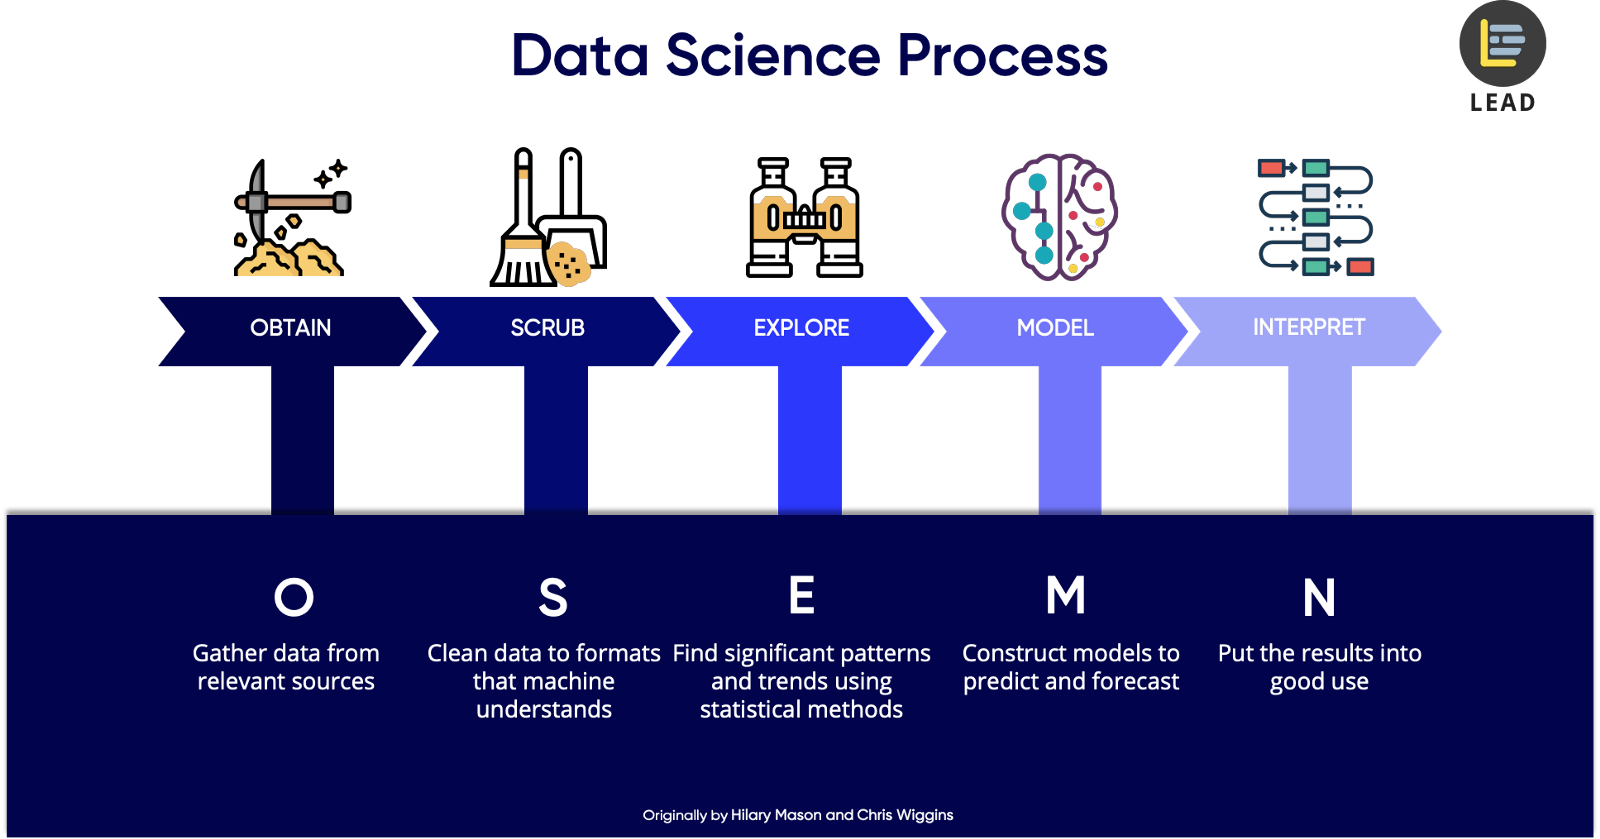

**_Obtain_**:

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**_Scrub_**:

During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**_Explore_**:

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**_Model_**:

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**_Interpret_**:

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  


In [1]:
# access the data file and get a visual of the information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for multicollinearity
import seaborn as sns

# look at results for each linear regression model using statsmodels
import statsmodels.formula.api as smf

kc = pd.read_csv('kc_house_data.csv')
print ('shape of the data -', kc.shape)
kc.head(10)

shape of the data - (21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Insert description of column names, grade, & condition here

For bathrooms:
Values are decimal and calculated as:
Full bathrooms (ensuite) = 1
Half bathrooms (separate )= 0.5
Powder rooms (only toilet and sink) = 0.25
(Dahlin, 2016)

II.  Scrub the data

In [2]:
# The id column is not needed so it can be dropped from the data
kc = kc.drop(['id'], axis=1)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


B.  Remove null values

In [3]:
# Check for null values in the dataset 
kc.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View has 63 null values.  Because this is not a significant number, these can be dropped from our data

In [4]:
print (kc.view.unique())
print (kc.view.value_counts())

[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [5]:
# select only the data for where the view is not a nan value
# convert view to data type string so the 'nan' data can be dropped
kc['view'] = kc.view.astype(str)
kc = kc[kc.view != 'nan'] 
kc['view'] = kc.view.astype(float)

# replace null values with 0 in waterfront column and change to data type integer
kc.waterfront = kc.waterfront.fillna(value=0)

# replace null values in yr_renovated with 0 and change to data type integer
kc.yr_renovated = kc.yr_renovated.fillna(value=0)


In [6]:
# Verify that there are not any more null values
kc.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C.  reformat some columns and remove outliers

In [7]:
# check to see how each column is categorized
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [8]:
kc.floors.value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [9]:
print(kc.bathrooms.value_counts())
kc = kc[kc['bathrooms'] < 6]

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


In [10]:
# Start with an initial data type conversion
# For columns that are obviouly categorized wrong, convert them to an appropriate data type
kc['date'] = pd.to_datetime(kc.date)

# set view, waterfront & yr_renovated as integer
kc['view'] = kc.view.astype(int)
kc['waterfront'] = kc.waterfront.astype(int)
kc['yr_renovated'] = kc.yr_renovated.astype(int)

In [11]:
# Check columns for unusable data by looking at the unique values for each variable
# change to correct data type as needed

kc.floors.unique()

kc.condition.unique()

kc.grade.unique()

kc.sqft_living.unique() 
kc.sqft_lot.unique()
kc.sqft_above.unique()

# Bedrooms has one extreme outlier.  Let's look at the unique values.
kc.bedrooms.unique()
print ('bedroom value counts:', kc.bedrooms.value_counts())
kc = kc[kc['bedrooms'] < 7]
                   
kc.sqft_basement.unique()

(kc.sqft_basement =='?').sum()  # there are 450 '?' in this column
(kc.sqft_basement == '0.0').sum()  # there are 12798 '0.0' values in this column

# Replace the '?' values with 0 in the sqft_basement data
kc['sqft_basement'] = (kc['sqft_basement'].replace('?', 0)).astype(float)
kc['sqft_basement'] = kc['sqft_basement'].astype(int)

# Instead of square feet values for the basement, let's just use a categorical value of 1 for if it has a basement
# and 0 for if it does not have a basement.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['basement'] = kc['sqft_basement'].apply(lambda row: 0 if row == 0 else 1)

print ('\nview value counts:', kc['view'].value_counts())

# A significant majority of the values for the variable view are 0, let's just use a categorical value of 1 for 
# if it has a view and 0 for if it does not have a view.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb

kc['has_view'] = kc['view'].apply(lambda row: 1 if row != 0 else 0)
print ('\nhas_view values:', kc['has_view'].unique())
                

bedroom value counts: 3     9791
4     6865
2     2754
5     1588
6      267
1      196
7       36
8       12
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

view value counts: 0    19366
2      952
3      505
1      327
4      311
Name: view, dtype: int64

has_view values: [0 1]


0       20726
2014       73
2003       30
2007       30
2013       30
2000       29
2005       28
1990       22
2004       22
2006       20
1989       20
2009       20
2002       17
1998       16
1991       16
2001       15
1984       15
1983       15
2008       15
1994       14
1986       14
1985       14
1999       14
2015       14
2010       14
1987       13
1992       13
1993       12
1997       12
1996       11
        ...  
1975        5
1964        5
1969        4
1981        4
1965        4
1973        4
1963        4
1958        3
1956        3
1945        3
1978        3
1955        3
1960        3
1972        3
1940        2
1957        2
1962        2
1967        2
1974        2
1951        1
1953        1
1946        1
1954        1
1950        1
1948        1
1934        1
1959        1
1971        1
1944        1
1976        1
Name: yr_renovated, Length: 70, dtype: int64
0       21200
2014       73
2013       30
2007       30
2005       28
2009       20
2006       20
200

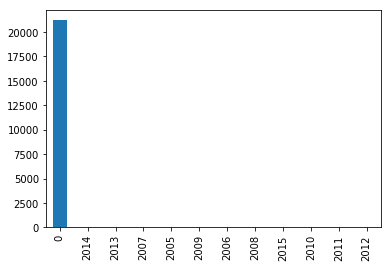

In [12]:
print(kc['yr_renovated'].value_counts())

# anything renovated before 2005 is 10 years old already
years = kc.loc[:,'yr_renovated']
for year in years:
    if year < 2005:
        kc['yr_renovated'] = (kc['yr_renovated'].replace(year, 0)).astype(int)
print (kc['yr_renovated'].value_counts())
kc['yr_renovated'].value_counts().plot(kind='bar')

In [13]:
# Convert the year built to reflect the age of the house. This format will be easier to visualize
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['yr_built'].describe()
kc['age'] = (kc.yr_built.max() - kc.yr_built + 1)
kc = kc.drop(['yr_built'], axis=1)
kc.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,has_view,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,98178,47.5112,-122.257,1340,5650,0,0,61
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,0,98125,47.7210,-122.319,1690,7639,1,0,65


In [14]:
# Get the range of zip codes and calculate bin size based on water locations 
kc.zipcode.describe()

count    21461.000000
mean     98077.930712
std         53.516313
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

/Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


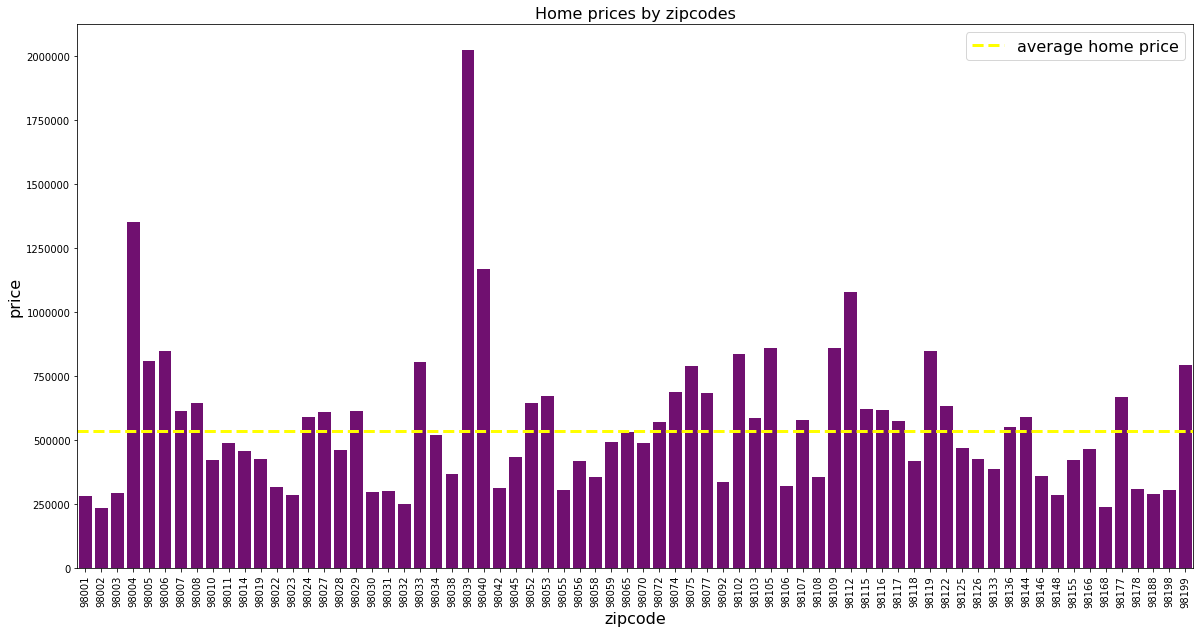

In [15]:
# plot home prices in zipcodes
# https://github.com/stevhliu/predicting-house-sales-price/blob/master/multivariable_linreg.ipynb

f, ax = plt.subplots(figsize = (20, 10))
#sequential_colors = sns.color_palette("RdPu", 10)
sns.barplot(kc['zipcode'], kc['price'], ci = False, color = 'purple')

# draw line for average home price
ax.axhline(y = kc['price'].mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average home price')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Home prices by zipcodes', fontsize = 16)
plt.xlabel('zipcode', fontsize = 16)
plt.ylabel('price', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

In [16]:
kc.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98146, 98038,
       98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98032, 98045, 98102, 98077, 98198, 98108, 98168, 98177,
       98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
       98106, 98072, 98188, 98065, 98014, 98055, 98039])

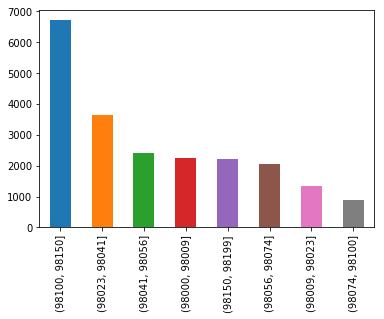

In [17]:
# create bins for zipcode
bins = [98000, 98009, 98023, 98041, 98056, 98074 , 98100 , 98150, 98199]
bins_zip = pd.cut(kc['zipcode'], bins)
bins_zip.value_counts().plot(kind='bar')

In [18]:
# replace the existing zipcode column
kc['zipcode'] = bins_zip
kc['zipcode'] = kc['zipcode'].cat.codes

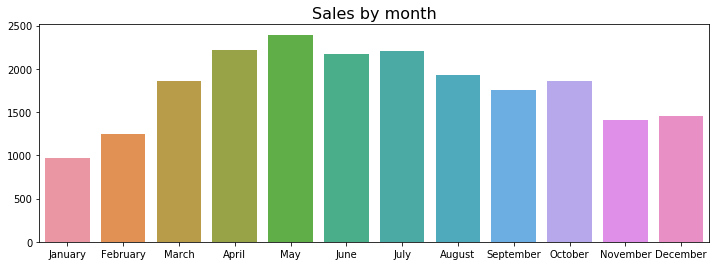

In [19]:
# graph the number of sales by month
# https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(kc.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

In [20]:
# Check that all data is converted to appropriate data type
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21461 entries, 0 to 21596
Data columns (total 22 columns):
date             21461 non-null datetime64[ns]
price            21461 non-null float64
bedrooms         21461 non-null int64
bathrooms        21461 non-null float64
sqft_living      21461 non-null int64
sqft_lot         21461 non-null int64
floors           21461 non-null float64
waterfront       21461 non-null int64
view             21461 non-null int64
condition        21461 non-null int64
grade            21461 non-null int64
sqft_above       21461 non-null int64
sqft_basement    21461 non-null int64
yr_renovated     21461 non-null int64
zipcode          21461 non-null int8
lat              21461 non-null float64
long             21461 non-null float64
sqft_living15    21461 non-null int64
sqft_lot15       21461 non-null int64
basement         21461 non-null int64
has_view         21461 non-null int64
age              21461 non-null int64
dtypes: datetime64[ns](1), float64(5)

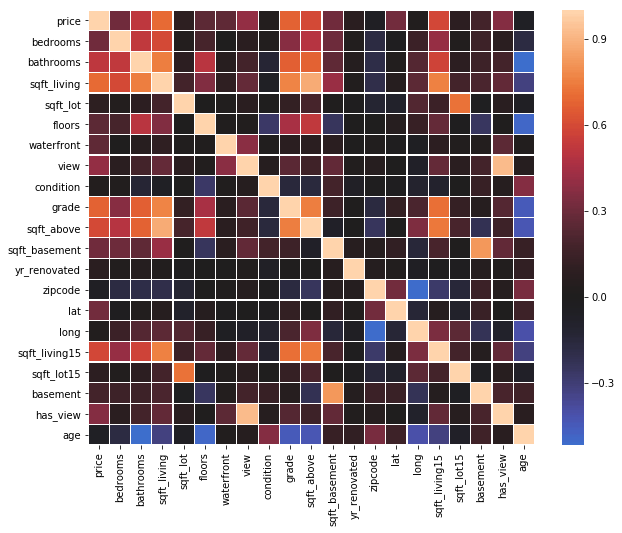

In [21]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kc.corr(), center = 0, linewidths = .25);

It looks like sqft_living, grade has high collinearity with some other features


A correlation is consider high if its absolute value is around 0.7 - 0.8.
Let's use 0.75 as a guide to see how many high correlations there are.
This showed a high correlation between sqft_lot and sqft_lot15.  Let's go ahead and
drop the sqft_lot15 variable

In [22]:
print (abs(kc.corr() > 0.75))

               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_renovated

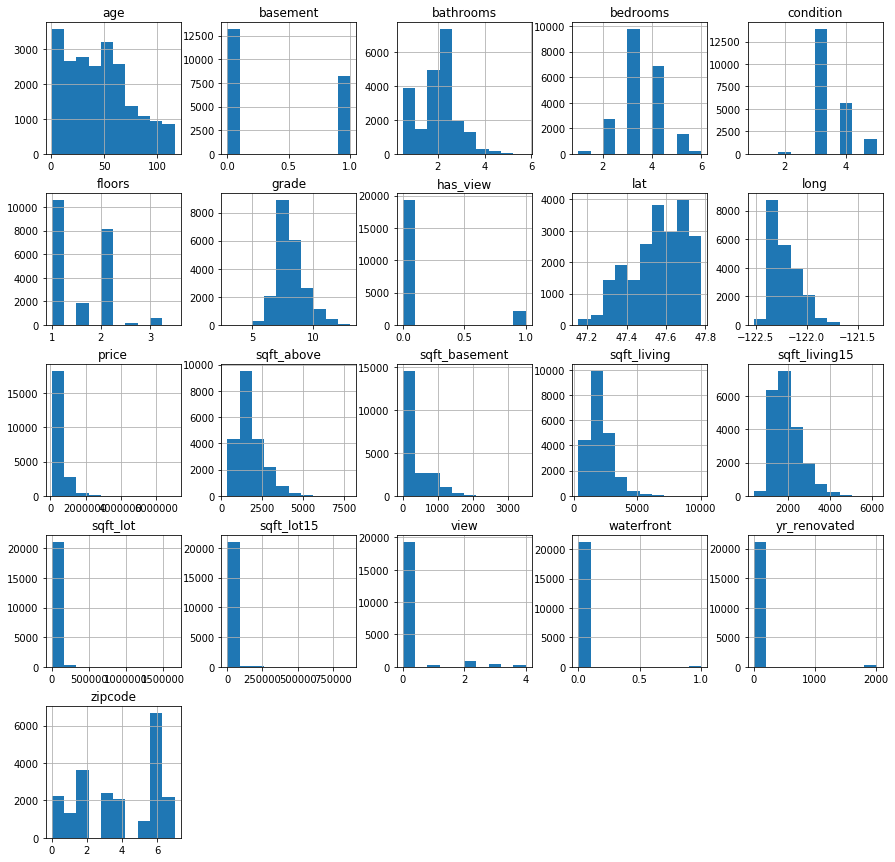

In [23]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers which need to be removed
kc.hist(figsize=(15,15));

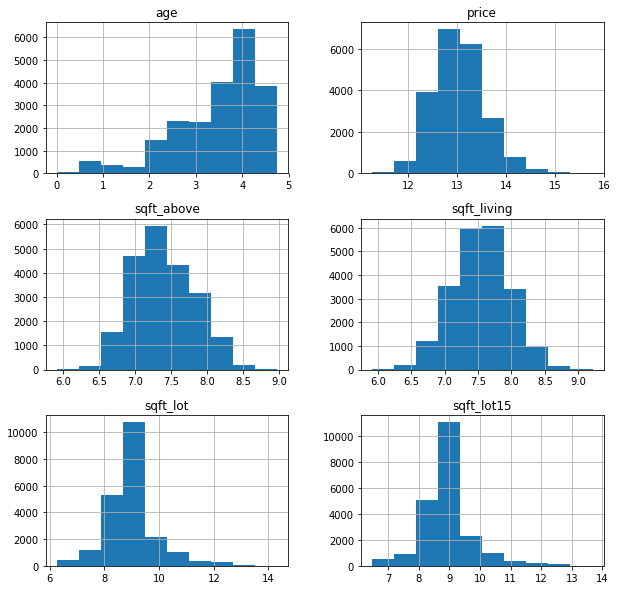

In [24]:
# Normalize the data of the continuous variables using log transformation

import numpy as np
kc_log = pd.DataFrame([])

kc_log['price'] = np.log(kc.price)
kc_log['age'] = np.log(kc.age)
kc_log['sqft_above'] = np.log(kc.sqft_above)
kc_log['sqft_living'] = np.log(kc.sqft_living)
kc_log['sqft_lot'] = np.log(kc.sqft_lot)
kc_log['sqft_lot15'] = np.log(kc.sqft_lot15)


# look at the histograms of the transformed data
kc_log.hist(figsize = (10,10));

Because bedrooms, condition, & floors could not be coerced into a normal distribution, they should be
considered for elimination.  Also latitude & longitude should be considered.

In [25]:
# Convert categorical columns to numeric format with one-hot encoding

kc['bedrooms'] = kc.bedrooms.astype('category')
kc['bathrooms'] = kc.bathrooms.astype('category')
kc['floors'] = kc.floors.astype('category')
kc['condition'] = kc.condition.astype('category')
kc['grade'] = kc.grade.astype('category')
kc['has_view'] = kc.has_view.astype('category')
kc['waterfront'] = kc.waterfront.astype('category')
kc['yr_renovated'] = kc.yr_renovated.astype('category')
kc['basement'] = kc.basement.astype('category')



bed_dummies = pd.get_dummies(kc.bedrooms, prefix = 'bedrooms')
bath_dummies = pd.get_dummies(kc.bathrooms, prefix = 'bathrooms')
floors_dummies = pd.get_dummies(kc.floors, prefix = 'floors')
cond_dummies = pd.get_dummies(kc.condition, prefix = 'condition')
grade_dummies = pd.get_dummies(kc.grade, prefix = 'grade')
has_view_dummies = pd.get_dummies(kc.has_view, prefix = 'view')
water_dummies = pd.get_dummies(kc.waterfront, prefix = 'waterfront')
renov_dummies = pd.get_dummies(kc.yr_renovated, prefix = 'yr_renovated')
basement_dummies = pd.get_dummies(kc.basement, prefix = 'basement')
zip_dummies = pd.get_dummies(bins_zip, prefix = 'zip')


# combine the log transformed data with the categorical dummy variables
kc_final = pd.concat([kc_log, bed_dummies, bath_dummies, floors_dummies, cond_dummies, grade_dummies], axis=1)
kc_final = pd.concat([kc_final, has_view_dummies, water_dummies, basement_dummies, zip_dummies], axis=1 )


In [26]:
# set the max_columns attribute in order to view all of the column names with the categorical data
pd.set_option('display.max_columns', None)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [27]:
# rename columns for bathrooms & floors to eliminate decimals

kc_final.rename(columns = {'bathrooms_0.5':'bath_h', 'bathrooms_0.75':'bath_3q', 'bathrooms_1.0':'bath_1'}, inplace=True)
kc_final.rename(columns = {'bathrooms_1.25':'bath1_q','bathrooms_1.5':'bath1_h', 'bathrooms_1.75':'bath1_3q', 'bathrooms_2.0':'bath_2'}, inplace=True)
kc_final.rename(columns = {'bathrooms_2.25':'bath2_q','bathrooms_2.5':'bath2_h', 'bathrooms_2.75':'bath2_3q', 'bathrooms_3.0':'bath_3'}, inplace=True)
kc_final.rename(columns = {'bathrooms_3.25':'bath3_q','bathrooms_3.5':'bath3_h', 'bathrooms_3.75':'bath3_3q', 'bathrooms_4.0':'bath_4'}, inplace=True)
kc_final.rename(columns = {'bathrooms_4.25':'bath4_q','bathrooms_4.5':'bath4_h', 'bathrooms_4.75':'bath4_3q', 'bathrooms_5.0':'bath_5'}, inplace=True)
kc_final.rename(columns = {'bathrooms_5.25':'bath5_q','bathrooms_5.5':'bath5_h', 'bathrooms_5.75':'bath5_3q'}, inplace=True)

kc_final.head(2)

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [28]:
# rename floors columns to remove decimals

kc_final.rename(columns = {'floors_1.0':'floors_1', 'floors_1.5':'floors_1h'}, inplace=True)
kc_final.rename(columns = {'floors_2.0':'floors_2', 'floors_2.5':'floors_2h'}, inplace=True)
kc_final.rename(columns = {'floors_3.0':'floors_3', 'floors_3.5':'floors_3h'}, inplace=True)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [29]:
# rename zipcode columns to remove issues with bin names

kc_final.rename(columns = {'zip_(98000, 98009]':'zip_1', 'zip_(98009, 98023]':'zip_2'}, inplace=True)
kc_final.rename(columns = {'zip_(98023, 98041]':'zip_3', 'zip_(98041, 98056]':'zip_4'}, inplace=True)
kc_final.rename(columns = {'zip_(98056, 98074]':'zip_5', 'zip_(98074, 98100]':'zip_6'}, inplace=True)
kc_final.rename(columns = {'zip_(98100, 98150]':'zip_7', 'zip_(98150, 98199]':'zip_8'}, inplace=True)

kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [30]:
# run an OLS regression on the log transformed continuous variables

col_names = kc_final.columns[1:6]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]

Kings County:  Price ~ sqft_living
-------------------------------------
['sqft_living', 0.45110252250039684, 6.753046881544533, 0.8336757752775648, 0.0]

Kings County:  Price ~ sqft_lot
-------------------------------------
['sqft_lot', 0.01835294091421613, 12.338667712384398, 0.07864813332304832, 1.942415727701488e-88]

Kings County:  Price ~ sqft_lot15
-------------------------------------
['sqft_lot15', 0.014766230712011996, 12.343527807578894, 0.07835497457624574, 2.1377520524499024e-71]


In [31]:
# Convert the results table to a dataframe
print ()
print ('1st iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)



1st iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0
3,sqft_living,0.451103,6.75305,0.833676,0
4,sqft_lot,0.0183529,12.3387,0.0786481,1.94242e-88
5,sqft_lot15,0.0147662,12.3435,0.078355,2.13775e-71


The p-value does not give us any significant value that shows a variable should be removed.
The three highest r-squared values are for grade, sqft_above, and sqft_living 

Remove obvious variables such as:
    p-value > .05 &
    r squared value that are very close to 0

In [32]:
# drop the columns with lowest r-squared values and also drop sqft_living since it is highly correlated
# with other features

drop_cols = ['sqft_lot', 'sqft_lot15', 'sqft_living']
kc_final = kc_final.drop(drop_cols, axis=1)


After removing the first round of variables, run the OLS again on the remaining variables.
Since a few columns have been deleted, the column indices need to be adjusted

In [33]:
# check the column indices as some have been removed
kc_final.head(2)

,price,age,sqft_above,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,4.110874,7.073270,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [34]:
col_names = kc_final.columns[1:3]

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]


In [35]:
# Convert the continuous variables results table to a dataframe
print ()
print ('2nd Iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)


2nd Iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0


In [36]:
# drop columns
drop_cols =['age']

kc_final = kc_final.drop(drop_cols, axis=1)


In [37]:
# use statsmodels to run ols on all the data  *** Mod 1 sec 11- multiple linear regression in statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     767.7
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:48:04   Log-Likelihood:                -4745.2
No. Observations:               21461   AIC:                             9604.
Df Residuals:                   21404   BIC:                         1.006e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9764      0.028    105.411      0.000       2.921       3.032
sqft_above       0.5057      0.011     46.506      0.000       0.484       0.527
bedrooms_1       0.5935      0.020     30.167      0.000       0.555       0.632
bedrooms_2       0.5483      0.008     67.247      0.000       0.532       0.564
bedrooms_3       0.4635      0.008     61.730      0.000       0.449       0.478
bedrooms_4       0.4682      0.009     54.994      0.000       0.452       0.485
bedrooms_5       0.4778      0.011     45.375      0.000       0.457       0.498
bedrooms_6       0.4250      0.018     23.607      0.000       0.390       0.460
bath_h          -0.1465      0.145     -1.008      0.313      -0.431       0.138
bath_3q          0.0878      0.040      2.177      0.030       0.009       0.167
bath_1           0.0543      0.017      3.182      0.001       0.021       0.088
bath1_q          0.0361      0.098      0.371      0.711      -0.155       0.227
bath1_h          0.0317      0.017      1.826      0.068      -0.002       0.066
bath1_3q         0.0922      0.016      5.617      0.000       0.060       0.124
bath_2           0.0790      0.017      4.707      0.000       0.046       0.112
bath2_q          0.0873      0.016      5.305      0.000       0.055       0.120
bath2_h          0.0641      0.016      4.102      0.000       0.033       0.095
bath2_3q         0.1073      0.017      6.250      0.000       0.074       0.141
bath_3           0.0882      0.018      4.832      0.000       0.052       0.124
bath3_q          0.1332      0.019      7.021      0.000       0.096       0.170
bath3_h          0.1146      0.018      6.255      0.000       0.079       0.151
bath3_3q         0.2095      0.028      7.568      0.000       0.155       0.264
bath_4           0.2097      0.029      7.115      0.000       0.152       0.268
bath4_q          0.2136      0.037      5.832      0.000       0.142       0.285
bath4_h          0.1607      0.033      4.797      0.000       0.095       0.226
bath4_3q         0.2407      0.065      3.694      0.000       0.113       0.368
bath_5           0.2274      0.067      3.419      0.001       0.097       0.358
bath5_q          0.2856      0.085      3.357      0.001       0.119       0.452
bath5_h          0.2947      0.100      2.954      0.003       0.099       0.490
bath5_3q         0.3054      0.172      1.780      0.075      -0.031       0.642
floors_1         0.5345      0.021     25.528      0.000       0.493       0.576
floors_1h        0.5831      0.022     26.722      0.000       0.540       0.626
floors_2         0.4587      0.021     21.810      0.000       0.417       0.500
floors_2h        0.5133      0.029     17.572      0.000       0.456       0.571
floors_3         0.4340      0.023     18.884      0.000       0.389       0.479
floor

In [38]:
kc_final.head(2)

,price,sqft_above,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,7.073270,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,7.682482,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [39]:
# now run an OLS regression with the categorical variables
col_names = kc_final.columns[2:] 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ bedrooms_1
-------------------------------------
['bedrooms_1', 0.007676823034775571, 13.049995627372033, -0.48223059371888677, 7.599300726158697e-38]

Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]

Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]

Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]

Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]

Kings County:  Price ~ bedrooms_6
-------------------------------------
['bedrooms_6', 0.005065169603328701, 13.04140913443771, 

['zip_6', 0.0021553541727775682, 13.040497154386056, 0.12107367927250245, 1.0143378648769076e-11]

Kings County:  Price ~ zip_7
-------------------------------------
['zip_7', 0.008166345514953322, 13.013718629943199, 0.10210829160341872, 3.7002546782627884e-40]

Kings County:  Price ~ zip_8
-------------------------------------
['zip_8', 0.016372500808838564, 13.068273051956153, -0.22055686695467358, 5.063500374719447e-79]


In [40]:
# convert the categorical variables results table to a dataframe
# set default to dispaly all rows
pd.set_option('display.max_rows', None)

print ()
print ('1st iteration - OLS with categorical variables')
pd.DataFrame(results)


1st iteration - OLS with categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bedrooms_1,0.00767682,13.05,-0.482231,7.5993e-38
2,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
3,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
4,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
5,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
6,bedrooms_6,0.00506517,13.0414,0.336171,1.64998e-25
7,bath_h,0.000373569,13.0457,-0.741302,0.00463218
8,bath_3q,0.00375988,13.0474,-0.559084,2.45579e-19
9,bath_1,0.115771,13.1288,-0.464777,0


With the first pass on categorical variables, p-values for bath1_q, floors_3h, and grade_3 are above the .05 threshold.
Low r-squared values include:
all condition columns
bath_h
floors_1h, floors_2h, floors_3h
grade_3




In [41]:
# eliminate categorical variables with low r-squared valuess

drop_cols1 = ['bath_h','bath_3q', 'bath1_q', 'bath1_3q', 'bath_2', 'bath2_q', 'bath2_h']
drop_cols2 = ['bath4_3q','bath_5', 'bath5_q', 'bath5_h']
drop_cols3 = ['bedrooms_1','bedrooms_6', 'floors_1h', 'floors_2h', 'floors_3', 'floors_3h']
drop_cols4 = ['condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5'] 
drop_cols5 = ['grade_3', 'grade_4', 'grade_13']
drop_cols6 = ['zip_1', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7']

kc_final = kc_final.drop(drop_cols1, axis=1)
kc_final = kc_final.drop(drop_cols2, axis=1)
kc_final = kc_final.drop(drop_cols3, axis=1)
kc_final = kc_final.drop(drop_cols4, axis=1)
kc_final = kc_final.drop(drop_cols5, axis=1)
kc_final = kc_final.drop(drop_cols6, axis=1)

In [42]:
# now run a second OLS regression with the remaining categorical variables and the dependent variable
col_names = kc_final.columns[2:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]

Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]

Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]

Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]

Kings County:  Price ~ bath_1
-------------------------------------
['bath_1', 0.11577131836182697, 13.12875361812366, -0.4647766760129499, 0.0]

Kings County:  Price ~ bath1_h
-------------------------------------
['bath1_h', 0.012652574778358572, 13.061379990630893, -0.2354670022705802, 2.23521303668

In [43]:
 # convert the remaining categorical variable results table to a dataframe
print ()
print ('2nd iteration - OLS with categorical variables')
pd.DataFrame(results)


2nd iteration - OLS with categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
2,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
3,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
4,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
5,bath_1,0.115771,13.1288,-0.464777,0
6,bath1_h,0.0126526,13.0614,-0.235467,2.23521e-61
7,bath2_3q,0.0141627,13.0306,0.273454,1.55849e-68
8,bath_3,0.0111592,13.0351,0.302533,2.62541e-54
9,bath3_q,0.0363715,13.0289,0.614224,6.50982e-175


In [44]:
# 2nd run - ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1116.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:48:21   Log-Likelihood:                -6251.6
No. Observations:               21461   AIC:                         1.257e+04
Df Residuals:                   21429   BIC:                         1.282e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2244      0.038    112.465      0.000       4.151       4.298
sqft_above       0.4061      0.011     38.121      0.000       0.385       0.427
bedrooms_2       0.0466      0.017      2.778      0.005       0.014       0.080
bedrooms_3      -0.0631      0.016     -3.977      0.000      -0.094      -0.032
bedrooms_4      -0.0489      0.016     -3.038      0.002      -0.080      -0.017
bedrooms_5      -0.0257      0.018     -1.461      0.144      -0.060       0.009
bath_1           0.0118      0.008      1.495      0.135      -0.004       0.027
bath1_h         -0.0212      0.009     -2.267      0.023      -0.040      -0.003
bath2_3q         0.0330      0.010      3.253      0.001       0.013       0.053
bath_3           0.0325      0.013      2.593      0.010       0.008       0.057
bath3_q          0.0791      0.014      5.480      0.000       0.051       0.107
bath3_h          0.0402      0.013      3.002      0.003       0.014       0.066
bath3_3q         0.1708      0.027      6.278      0.000       0.117       0.224
bath_4           0.1317      0.030      4.421      0.000       0.073       0.190
bath4_q          0.1577      0.039      4.082      0.000       0.082       0.233
bath4_h          0.0848      0.035      2.452      0.014       0.017       0.153
bath5_3q         0.5136      0.190      2.703      0.007       0.141       0.886
floors_1        -0.1334      0.007    -18.244      0.000      -0.148      -0.119
floors_2        -0.1924      0.008    -24.931      0.000      -0.208      -0.177
grade_5         -0.4178      0.057     -7.331      0.000      -0.530      -0.306
grade_6         -0.2599      0.054     -4.842      0.000      -0.365      -0.155
grade_7         -0.0945      0.053     -1.770      0.077      -0.199       0.010
grade_8          0.0829      0.054      1.548      0.122      -0.022       0.188
grade_9          0.3152      0.054      5.831      0.000       0.209       0.421
grade_10         0.4932      0.055      8.999      0.000       0.386       0.601
grade_11         0.6520      0.057     11.477      0.000       0.541       0.763
grade_12         0.8610      0.066     13.145      0.000       0.733       0.989
view_0           2.0077      0.019    105.375      0.000       1.970       2.045
view_1           2.2167      0.019    114.369      0.000       2.179       2.255
waterfront_0     1.8732      0.022     86.652      0.000       1.831       1.916
waterfront_1     2.3512      0.025     93.407      0.000       2.302       2.401
basement_0       1.9914      0.020    100.043      0.000       1.952       2.030
basement_1       2.2330      0.018    123.735      0.000       2.198       2.268
zip_2           -0.2937      0.009    -31.681      0.000      -0.312      -0.276
zip_8           -0.1549      0.007    -20.696      0.000      -0.170      -0.140
=====

In [45]:
# dropped columns
drop_cols1 = ['grade_8', 'zip_8']
drop_cols2 = ['bath1_h', 'bath2_3q', 'bath_3', 'bath3_3q', 'bath_4', 'bath4_q', 'bath4_h', 'bath5_3q']
kc_final = kc_final.drop(drop_cols1, axis=1)
kc_final = kc_final.drop(drop_cols2, axis=1)


In [46]:
# use statsmodels to run ols on all the data  *** Mod 1 sec 11- multiple linear regression in statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1585.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:48:23   Log-Likelihood:                -6510.7
No. Observations:               21461   AIC:                         1.307e+04
Df Residuals:                   21439   BIC:                         1.324e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2086      0.033    128.892      0.000       4.145       4.273
sqft_above       0.4223      0.011     40.081      0.000       0.402       0.443
bedrooms_2       0.0308      0.017      1.839      0.066      -0.002       0.064
bedrooms_3      -0.0814      0.016     -5.168      0.000      -0.112      -0.051
bedrooms_4      -0.0675      0.016     -4.214      0.000      -0.099      -0.036
bedrooms_5      -0.0334      0.018     -1.889      0.059      -0.068       0.001
bath_1           0.0129      0.008      1.681      0.093      -0.002       0.028
bath3_q          0.0562      0.014      3.923      0.000       0.028       0.084
bath3_h          0.0126      0.013      0.960      0.337      -0.013       0.038
floors_1        -0.1428      0.007    -19.367      0.000      -0.157      -0.128
floors_2        -0.1899      0.008    -24.414      0.000      -0.205      -0.175
grade_5         -0.5034      0.023    -21.976      0.000      -0.548      -0.458
grade_6         -0.3558      0.010    -34.315      0.000      -0.376      -0.335
grade_7         -0.1816      0.006    -29.840      0.000      -0.193      -0.170
grade_9          0.2374      0.008     28.854      0.000       0.221       0.254
grade_10         0.4300      0.012     36.436      0.000       0.407       0.453
grade_11         0.6064      0.019     32.474      0.000       0.570       0.643
grade_12         0.8259      0.038     21.678      0.000       0.751       0.901
view_0           2.0067      0.017    121.002      0.000       1.974       2.039
view_1           2.2019      0.017    128.917      0.000       2.168       2.235
waterfront_0     1.8732      0.020     95.570      0.000       1.835       1.912
waterfront_1     2.3354      0.024     99.292      0.000       2.289       2.381
basement_0       1.9801      0.018    112.340      0.000       1.946       2.015
basement_1       2.2285      0.015    144.316      0.000       2.198       2.259
zip_2           -0.2776      0.009    -29.723      0.000      -0.296      -0.259
==============================================================================
Omnibus:                       23.353   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.849
Skew:                           0.039   Prob(JB):                     2.44e-06
Kurtosis:                       3.151   Cond. No.                     7.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
y  = kc_final['price']
X = kc_final.drop('price', axis=1)
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X, y)
selector.ranking_

array([ 1, 13,  9, 10, 11, 14, 12, 15,  6,  5,  1,  3,  4,  1,  1,  1,  1,
        8,  2,  1,  1,  1,  7,  1])

In [48]:
kc_final.head(2)

,price,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bath_1,bath3_q,bath3_h,floors_1,floors_2,grade_5,grade_6,grade_7,grade_9,grade_10,grade_11,grade_12,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_2
0,12.309982,7.073270,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,13.195614,7.682482,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0


In [49]:
kc_final = kc_final.drop(kc_final.columns[2:11], axis=1)
kc_final.head()

,price,sqft_above,grade_5,grade_6,grade_7,grade_9,grade_10,grade_11,grade_12,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_2
0,12.309982,7.073270,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,13.195614,7.682482,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,12.100712,6.646391,0,1,0,0,0,0,0,1,0,1,0,1,0,0
3,13.311329,6.956545,0,0,1,0,0,0,0,1,0,1,0,0,1,0
4,13.142166,7.426549,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [51]:
kc_final = kc_final.drop('view_0', axis=1)

In [56]:
drop_cols = ['grade_6', 'grade_7', 'basement_1']
kc_final = kc_final.drop(drop_cols, axis=1)

In [57]:
# 2nd run - ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     2817.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:55:05   Log-Likelihood:                -7566.3
No. Observations:               21461   AIC:                         1.515e+04
Df Residuals:                   21450   BIC:                         1.524e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.3013      0.037    169.872      0.000       6.229       6.374
sqft_above       0.5309      0.007     71.035      0.000       0.516       0.546
grade_5         -0.2332      0.023    -10.265      0.000      -0.278      -0.189
grade_9          0.2818      0.008     34.004      0.000       0.266       0.298
grade_10         0.4479      0.012     37.303      0.000       0.424       0.471
grade_11         0.6042      0.019     31.515      0.000       0.567       0.642
grade_12         0.7983      0.040     20.122      0.000       0.721       0.876
view_1           0.2263      0.009     26.479      0.000       0.210       0.243
waterfront_0     2.9213      0.020    143.119      0.000       2.881       2.961
waterfront_1     3.3800      0.027    126.332      0.000       3.328       3.432
basement_0      -0.2873      0.005    -55.656      0.000      -0.297      -0.277
zip_2           -0.3041      0.010    -31.145      0.000      -0.323      -0.285
==============================================================================
Omnibus:                        6.331   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.108
Skew:                           0.022   Prob(JB):                       0.0472
Kurtosis:                       2.930   Cond. No.                     3.66e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
kc_final.head(2)

,price,sqft_above,grade_5,grade_9,grade_10,grade_11,grade_12,view_1,waterfront_0,waterfront_1,basement_0,zip_2
0,12.309982,7.073270,0,0,0,0,0,0,1,0,1,0
1,13.195614,7.682482,0,0,0,0,0,0,1,0,0,0


Model Validation - using a train-test-split

In [59]:
X = kc_final.drop(['price'], axis=1)
y = kc_final['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

# look at the residuals
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

print ('Training Data Residuals: ', train_residuals)
print ()
print ()
print ('Test Data Residuals: ', test_residuals)




Training Data Residuals:  6636    -0.013092
1867     0.291514
17978   -0.269594
4721    -0.165774
11919    0.270958
776      0.675792
8895     0.016746
5433    -0.348362
18518   -0.043176
3571     0.204988
6228     0.263150
4858     0.245703
2427    -0.799162
15243    0.425579
8806     0.261524
13100   -0.158870
4518    -0.377318
2502     0.174405
6678     0.085760
2235     0.854502
810     -0.031162
12264   -0.560538
557      0.400409
16934   -0.063722
723     -0.169008
11916    0.064798
2765    -0.206431
13545    0.852215
9304    -0.079880
6647     0.666699
10330   -0.215277
565     -0.057260
7589     0.072890
4887     0.242420
19876    0.223147
19164   -0.005708
15501    0.392283
345      0.587713
13952    0.504444
18249   -0.212980
13215    0.884371
4677    -0.433479
15307    0.106790
20592   -0.104289
16556    0.617029
18870   -0.016782
13499   -0.033992
11155    0.196659
16077   -0.004921
8410     0.193855
18434   -0.029724
4484     0.112109
20719    0.435342
3067     0.569472
56

Test Data Residuals:  5529    -0.420058
12977    0.163361
10930   -0.190473
10353   -0.104976
17256    0.513525
6762     0.297742
17526    0.138673
5858    -0.511740
12689   -0.138025
4558    -0.212408
7320    -0.206392
496     -0.035356
13265   -0.136310
10821   -0.000877
16956    0.450782
8027     0.280265
19909   -0.008118
18749   -0.104363
20353   -0.751236
21242    0.269270
20331    0.528108
14355   -0.230061
13614    0.730971
9785     0.136542
8492    -0.480950
685     -0.128408
16594   -0.020675
3434     0.441344
12613   -0.055742
1083    -0.294567
17746    0.417838
13908   -0.034376
10139   -0.355009
7015     0.088575
3704    -0.030929
19349    0.617009
4755     0.072404
15361    0.028889
12683   -0.504518
14719   -0.130829
10764   -0.458911
1669     0.024022
18359   -0.334740
18633   -0.081178
8185     0.381977
7720     0.715629
14771   -0.685364
4667     0.002024
6142     0.029072
4208     0.609722
4546     0.417324
9798    -0.107309
15546    0.094720
10388   -0.088338
19881 

In [60]:
print (linreg.score(X,y))

0.5676254564180399


In [61]:
# mean squarred error
mse_train = np.sum((y_train - yhat_train)**2) / len(y_train)
mse_test= np.sum((y_test - yhat_test)**2) / len(y_test)

print ('Train Mean Squarred Error: ', mse_train)
print ('Test Mean Squarred Error: ', mse_test)

Train Mean Squarred Error:  0.11896333522407754
Test Mean Squarred Error:  0.11677164650179019
